In [8]:
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature, filters

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def showme(image, ax=None, cmap=None):
    if ax is None:
        ax = pl.figure().add_subplot(111)

    if cmap is None:
        ax.imshow(image)
    else:
        ax.imshow(image, cmap=cmap)
    ax.axis('off')
    

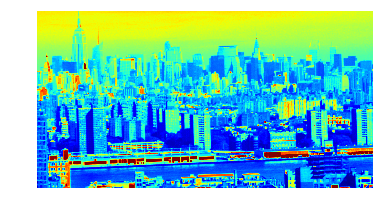

In [194]:
rawimg = np.fromfile("img1.raw", np.uint8)
rawimg = rawimg.reshape([2160,4096,3])
imgsq = rawimg.astype(float)**1
imgsq *= 255 / imgsq.max()
img2d = (imgsq.reshape([2160,4096,3]).sum(2) / 3.)
img2d /= img2d.max()
showme(img2d)

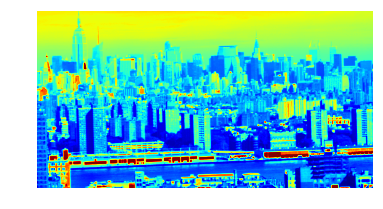

In [195]:
smoothImg = nd.filters.gaussian_filter(img2d, [4, 4])
showme(smoothImg)

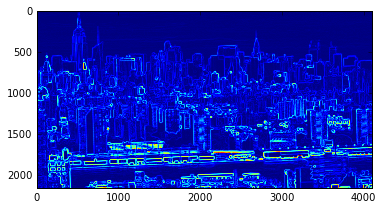

In [196]:
imgedge = sobel(smoothImg)
pl.imshow(imgedge)

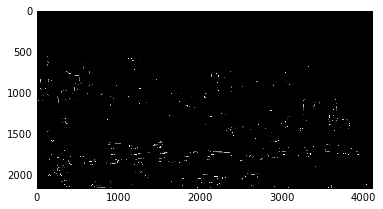

In [197]:
edges1 = feature.canny(smoothImg2d)
pl.imshow(edges1, cmap = 'gray')